# Credit Card Fraud Management

<b>Import Libraries</b>

In [1]:
# important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<b>Get the dataset</b>

In [2]:
# Grab the data
df = pd.read_csv('creditcard.csv')

In [3]:
# chunk of the data
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

<b>Checking Missing Data</b>

In [4]:
# null checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
# more details to the data
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

Looking to the <b>Time</b> feature, we can confirm that the data contains <b>284,807</b> transactions, during 2 consecutive days (or <b>172792</b> seconds).

<b>Fraud/Genuine Ratio</b>
Checking data unbalance

Text(0, 0.5, 'Frequency')

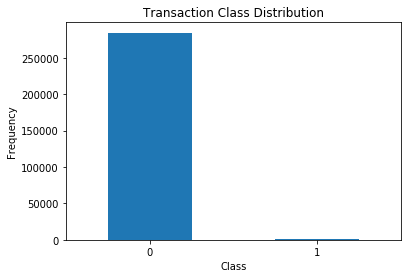

In [6]:
# Data Imbalance Checking
count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
genuine = float(df[df['Class']==0]['Class'].value_counts())
fraud = float(df[df['Class']==1]['Class'].value_counts())
print('Ratio Fraud/Genuine is ',round(fraud*100/genuine,3),'%')

Ratio Fraud/Genuine is  0.173 %


In [9]:
# The data is highly imbalanced

<b>Data Exploration</b>

In [10]:
# Transaction in Time

In [11]:
import plotly.figure_factory as ff
from plotly.offline import iplot

C:\Users\User\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
class_0 = df.loc[df['Class'] == 0]['Time']
class_1 = df.loc[df['Class'] == 1]['Time']

In [13]:
class_0.head() #'Time' where 'Class' is 0

0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64

In [14]:
hist_data = [class_0, class_1]
group_labels = ['Genuine', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

Fraudulent transactions have a distribution more even than genuine transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

In [15]:
# Transaction in Amount

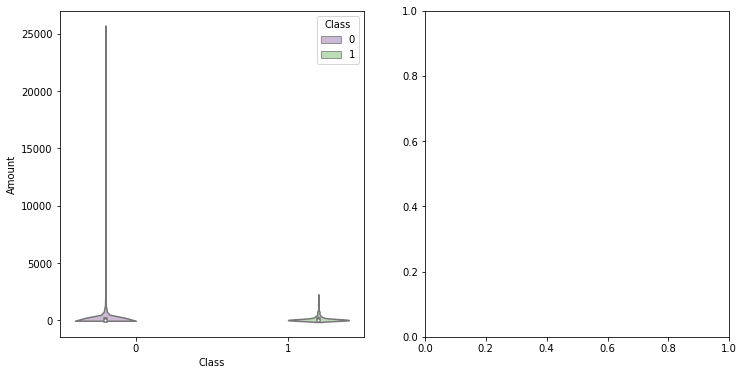

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.violinplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn")
plt.show();

In [22]:
class_0 = df[df['Class'] == 0]['Amount'] # 'Amount' while 'Class' is 0
class_1 = df[df['Class'] == 1]['Amount'] # 'Amount' while 'Class' is 1
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The real transaction have a lower mean value, larger Q1, smaller Q3 and larger outliers; fraudulent transactions have a smaller Q1 and outlier, larger Q4 and mean.

In [24]:
# let's check fraudulent transactions amount and genuine transaction amount by time
fraud = df[df['Class'] == 1]
genuine = df[df['Class'] == 0]

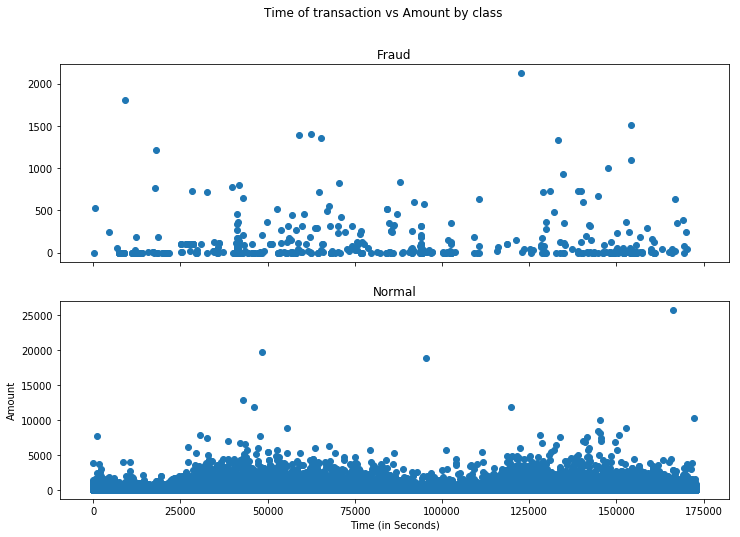

In [26]:
# Rentang waktu transaksi adalah sekitar 2 hari
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,8))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud['Time'], fraud['Amount'])
ax1.set_title('Fraud')
ax2.scatter(genuine['Time'], genuine['Amount'])
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Fraudulent transaction Amount is still not bigger than genuine transaction, but it has big enough value. 

Let's check more in how much amount do fraudulent transaction occur and in how much time.

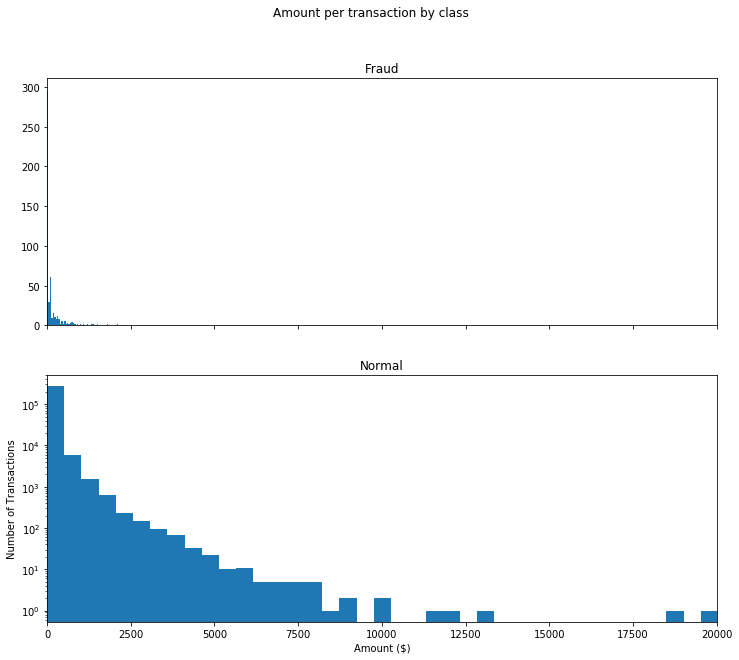

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,10))
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(genuine.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [31]:
# Feature correlation checking

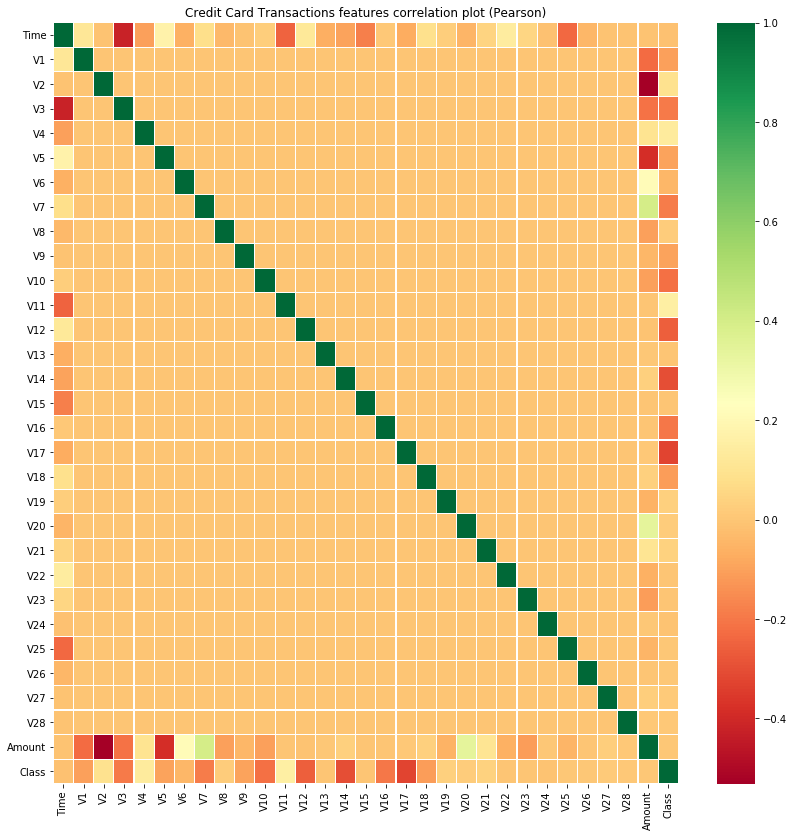

In [32]:
plt.figure(figsize=(14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,linewidths=.1,cmap="RdYlGn")

As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

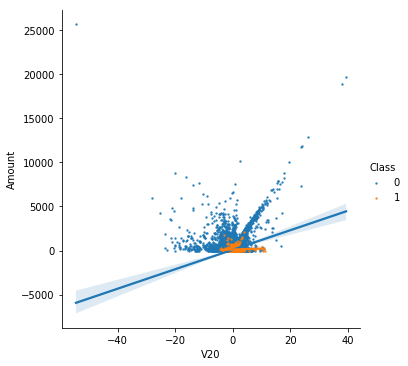

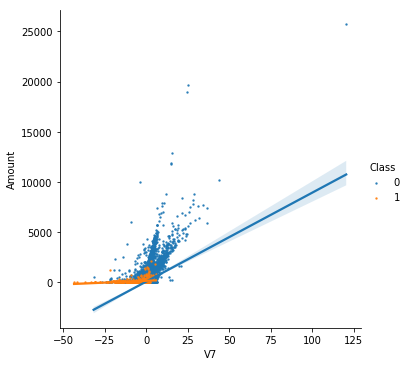

In [33]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

Let's plot now the inverse correlated values.

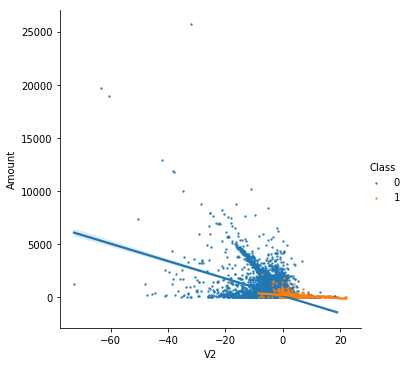

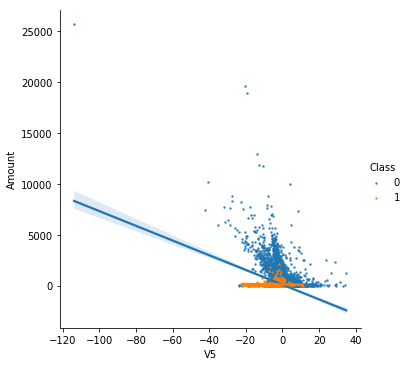

In [34]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

<b>Feature density plot</b>

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



<Figure size 432x288 with 0 Axes>

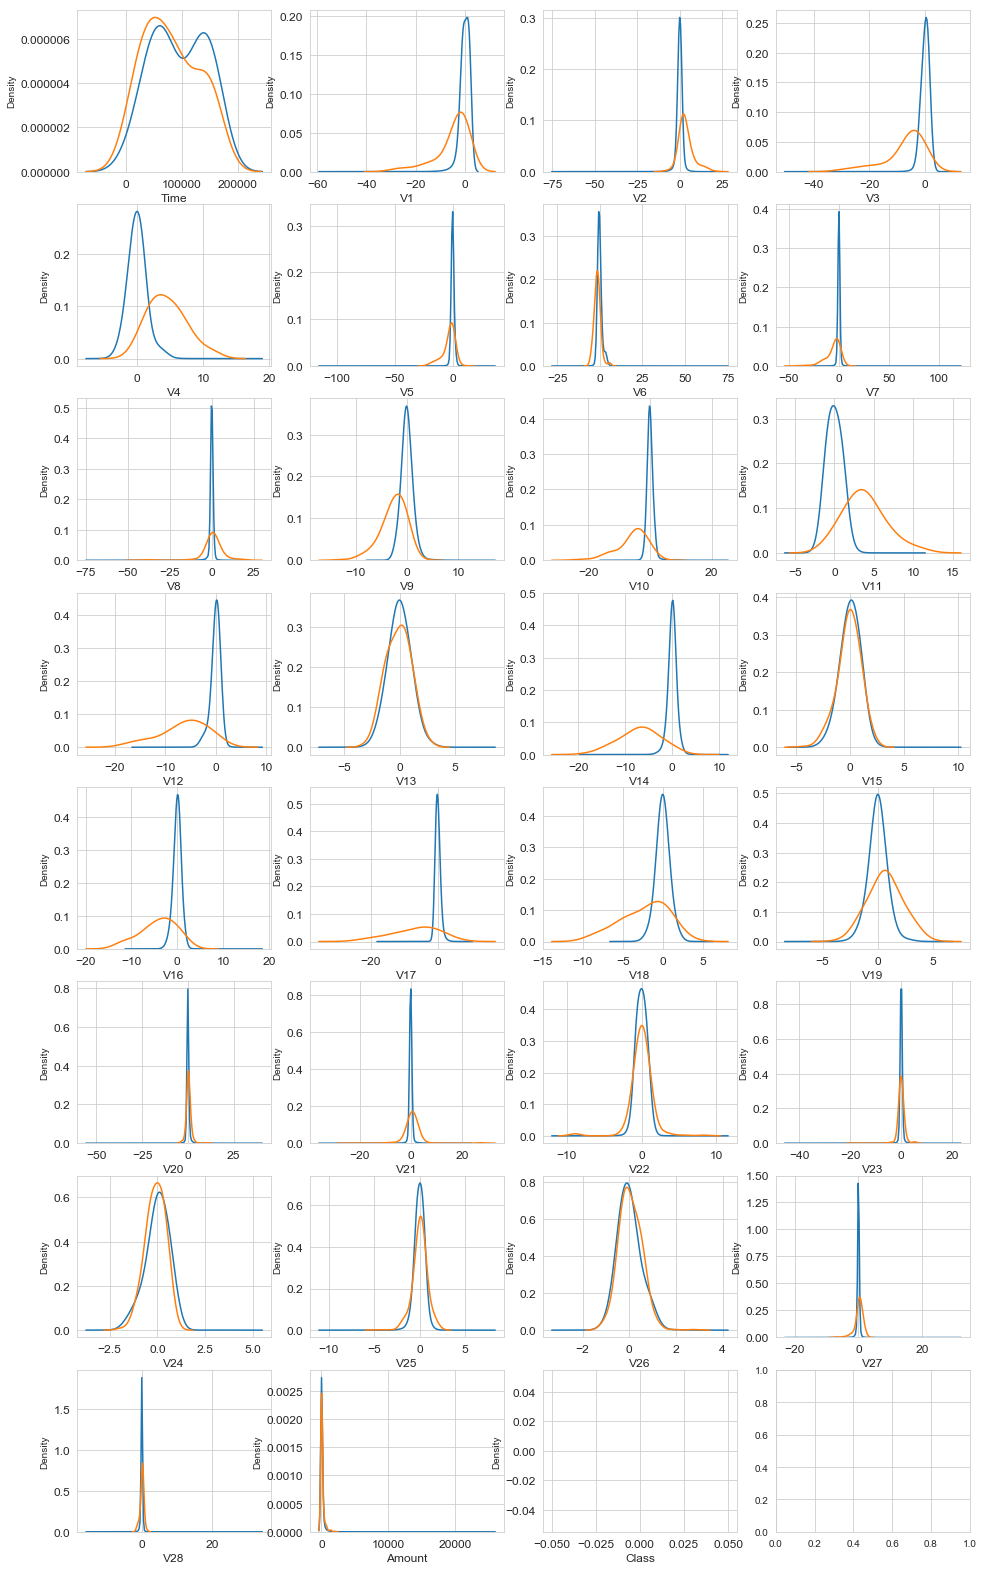

In [28]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw_method=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw_method=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

<b>Predictive models</b>

In [31]:
# Define predictors and target values
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [32]:
# Useful Constanta
RFC_METRIC = 'gini'  # metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 # number of estimators used for RandomForrestClassifier
NO_JOBS = 4 # number of parallel jobs used for RandomForrestClassifier

#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 # lgb iterations
EARLY_STOP = 50 # lgb early stop 
OPT_ROUNDS = 1000  # To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 # Print out metric result

IS_LOCAL = False

In [33]:
# Split train data, test data, and validation set data
from sklearn.model_selection import train_test_split

In [34]:
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

<b>Random Forest Classifier</b>

Define model parameters
Let's set the parameters for the model.

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) [4]. Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [92]:
# Let's train the RandomFOrestClassifier using the train_df data and fit function

In [93]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [39]:
# Let's now predict the target values for the valid_df data, using predict function.

In [94]:
preds = clf.predict(valid_df[predictors])

In [41]:
# Features importance

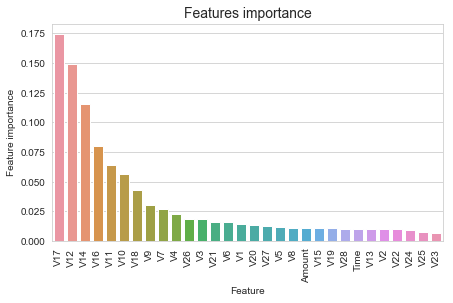

In [42]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [43]:
# The most important features are V17, V12, V14, V10, V11, V16

In [44]:
# Confusion matrix

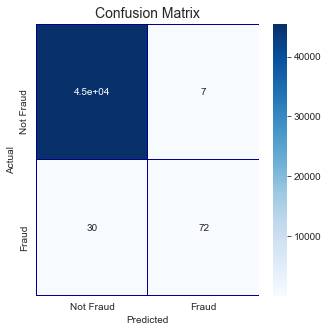

In [45]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

<b>Type I error and Type II error</b>

We need to clarify that confussion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

Null Hypothesis (H0) - The transaction is not a fraud.
Alternative Hypothesis (H1) - The transaction is a fraud.

Type I error - You reject the null hypothesis when the null hypothesis is actually true.
Type II error - You fail to reject the null hypothesis when the the alternative hypothesis is true.

Cost of Type I error - You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.
Cost of Type II error - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

In [46]:
# Let's calculate the ROC-AUC score
from sklearn.metrics import roc_auc_score, accuracy_score

In [47]:
roc_auc_score(valid_df[target].values, preds)

0.8528641975628091

In [95]:
accuracy_score(valid_df[target].values, preds)

0.999188044503939

The ROC-AUC score obtained with RandomForrestClassifier is 0.85

<b>AdaBoostClassifier</b>

AdaBoostClassifier stands for Adaptive Boosting Classifier

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [98]:
# fit the model
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2018)

In [99]:
preds = clf.predict(valid_df[predictors])

In [52]:
# Features importance

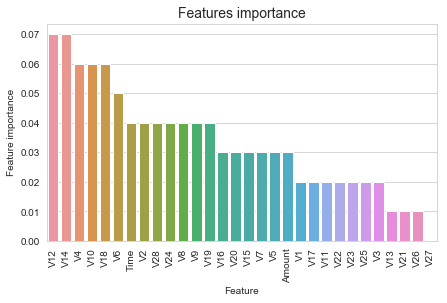

In [53]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [54]:
# Confusion matrix

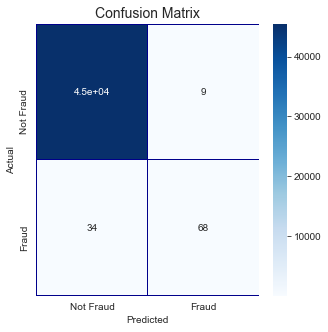

In [55]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [56]:
# Let's calculate also the ROC-AUC.
roc_auc_score(valid_df[target].values, preds)

0.8332343604519027

In [100]:
accuracy_score(valid_df[target].values, preds)

0.9990563760451184

<b>CatBoostClassifier</b>

CatBoostClassifier is a gradient boosting for decision trees algorithm with support for handling categorical data

In [101]:
from catboost import CatBoostClassifier

In [102]:
clf = CatBoostClassifier(iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = VERBOSE_EVAL,
                             od_wait=100)

In [103]:
# fit training the data
clf.fit(train_df[predictors], train_df[target].values,verbose=True)

0:	total: 530ms	remaining: 4m 24s
50:	total: 27.1s	remaining: 3m 58s
100:	total: 52.1s	remaining: 3m 25s
150:	total: 1m 16s	remaining: 2m 55s
200:	total: 1m 40s	remaining: 2m 28s
250:	total: 2m 3s	remaining: 2m 2s
300:	total: 2m 28s	remaining: 1m 38s
350:	total: 2m 52s	remaining: 1m 13s
400:	total: 3m 17s	remaining: 48.8s
450:	total: 3m 42s	remaining: 24.1s
499:	total: 4m 6s	remaining: 0us


In [104]:
preds = clf.predict(valid_df[predictors])

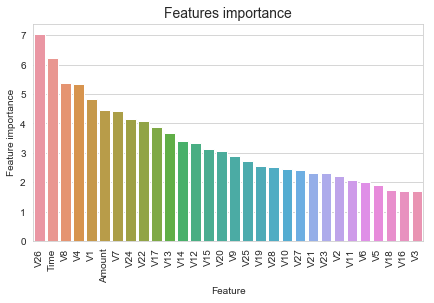

In [61]:
# feature importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

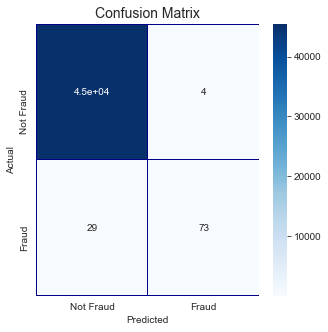

In [62]:
# Confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [63]:
# Let's calculate also the ROC-AUC
roc_auc_score(valid_df[target].values, preds)

0.8577991493075996

In [105]:
accuracy_score(valid_df[target].values, preds)

0.9992758234764862

<b>XGBoost</b>

In [106]:
import xgboost as xgb

In [107]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [108]:
# train the model
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[13:26:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.89296	valid-auc:0.85272
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.93947	valid-auc:0.88200
[100]	train-auc:0.94415	valid-auc:0.89094
[150]	train-auc:0.97837	valid-auc:0.96362
[200]	train-auc:0.99002	valid-auc:0.98397
[250]	train-auc:0.99382	valid-auc:0.98592
[300]	train-auc:0.99567	valid-auc:0.98667
Stopping. Best iteration:
[282]	train-auc:0.99517	valid-auc:0.98706



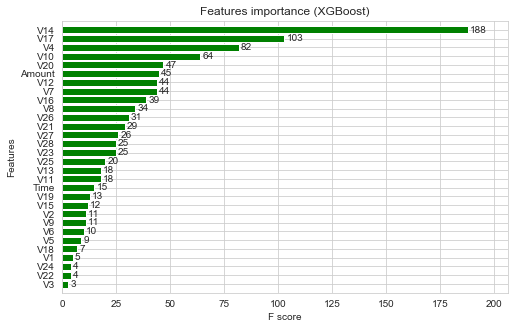

In [67]:
# feature importance
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [109]:
preds = model.predict(dtest)

In [112]:
# let's calculate ROC-AUC
roc_auc_score(test_df[target].values, preds)

0.9766700080897612

In [114]:
# accuracy_score(test_df[target].values, preds)

<b>LightGBM</b>

In [115]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [116]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

In [117]:
# split the data
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

In [118]:
# running the model
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035972 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.997909	valid's auc: 0.952288
[100]	train's auc: 0.999032	valid's auc: 0.945553
Early stopping, best iteration is:
[29]	train's auc: 0.996594	valid's auc: 0.957864


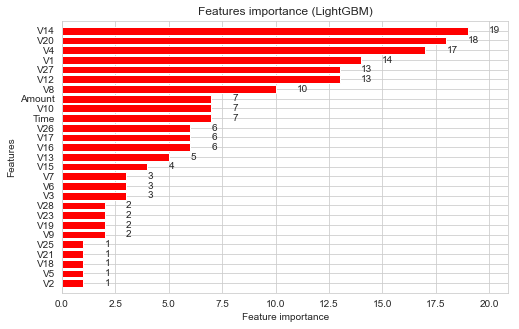

In [75]:
# feature importance
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

In [119]:
preds = model.predict(test_df[predictors])

In [120]:
# let's calculate ROC-AUC
roc_auc_score(test_df[target].values, preds)

0.9473337202349548

In [122]:
# accuracy_score(test_df[target].values, preds)

Training and validation using cross-validation
Let's use now cross-validation. We will use cross-validation (KFolds) with 5 folds. Data is divided in 5 folds and, by rotation, we are training using 4 folds (n-1) and validate using the 5th (nth) fold.

Test set is calculated as an average of the predictions

In [78]:
from sklearn.model_selection import KFold
import gc

In [79]:
kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)

[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.970275	valid_1's auc: 0.990668
Early stopping, best iteration is:
[6]	training's auc: 0.967014	valid_1's auc: 0.994598
Fold  1 AUC : 0.994598
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.97612	valid_1's auc: 0.962458
Early stopping, best iteration is:
[26]	training's auc: 0.977679	valid_1's auc: 0.969603
Fold  2 AUC : 0.969603
[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=-1 will be ignored. Current value: num_threads=-1
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.980458	valid_1's auc: 0.948161
Early stopping, best iteration is:
[42]	training's auc: 0.981423	valid_1's auc: 0.948699
Fo

The AUC score for the prediction from the test data was 0.943

In [84]:
pred = test_preds

<b>Isolation Forest, Local Outlier Factor, Support Vector Machine</b>

In [80]:
## Take some sample of the data

data1= df.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [81]:
df.shape

(284807, 31)

In [82]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

genuine = df[df['Class']==0]

outlier_fraction = len(fraud)/float(len(genuine))

In [83]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


<b>Model Prediction</b>

In [84]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score

In [85]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

In [86]:
type(classifiers)

dict

In [87]:
from sklearn.metrics import confusion_matrix

In [89]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Confusion matrix :")
    print(confusion_matrix(Y,y_pred))
    print("ROC AUC Score :")
    print(roc_auc_score(Y,y_pred))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print(" ")

Isolation Forest: 73
Confusion matrix :
[[28395    37]
 [   36    13]]
ROC AUC Score :
0.632002385929048
Accuracy Score :
0.9974368877497279
 
Local Outlier Factor: 97
Confusion matrix :
[[28383    49]
 [   48     1]]
ROC AUC Score :
0.5093423765116627
Accuracy Score :
0.9965942207085425
 
Support Vector Machine: 8516
Confusion matrix :
[[19947  8485]
 [   31    18]]
ROC AUC Score :
0.5344577969060443
Accuracy Score :
0.7009936448860644
 


<b>Conclusion</b>

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For the first three models, we only used the train and test set.

We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.85 when predicting the target for the test set.

We followed with an AdaBoostClassifier model, with lower AUC score (0.83) for prediction of the test set target values.

We then followed with an CatBoostClassifier, with the AUC score after training 500 iterations 0.86.

We then experimented with a XGBoost model. In this case, se used the validation set for validation of the training model. The AUC score obtained was 0.98.

We then presented the data to a LightGBM model. We used both train-validation split and cross-validation to evaluate the model effectiveness to predict 'Class' value, i.e. detecting if a transaction was fraudulent. With the first method we obtained values of AUC for the validation set around 0.978. For the test set, the score obtained was 0.947.
With the cross-validation, we obtained an AUC score for the test prediction of 0.943.

The last 3 models we used here prove that accuracy score is not always the best metric. These 3 models was ranked 3 smallest ROC AUC score with Isolation Forest 0.63, Local Outlier Factor 0.51, and SVM 0.53